In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
events_data = pd.read_csv('D:\statistics\event_data_train\event_data_train.csv')
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [4]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [5]:
events_data['date'] = pd.to_datetime(events_data.timestamp,unit='s')

In [6]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [7]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [8]:
events_data.date.min() # date of start course

Timestamp('2015-06-15 04:00:48')

In [9]:
events_data.date.max()

Timestamp('2016-03-25 14:57:48')

In [10]:
events_data['day'] = events_data.date.dt.date

In [11]:
events_data.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


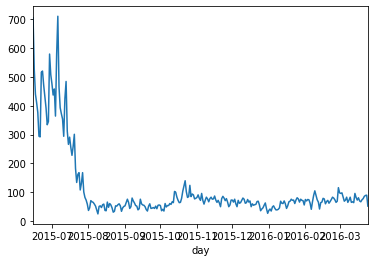

In [12]:
events_data.groupby('day').user_id.nunique().plot()

In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [14]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index = False).agg({'step_id' : 'count'})\
.rename(columns = {'step_id' : 'passed_steps'}).head()

,user_id,passed_steps
0,3,87
1,14,3
2,16,135
3,18,2
4,20,8


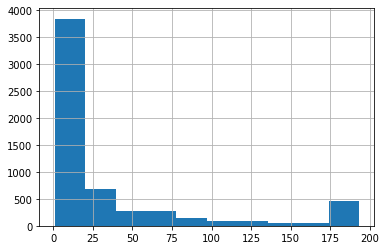

In [15]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index = False).agg({'step_id' : 'count'})\
.rename(columns = {'step_id' : 'passed_steps'}).passed_steps.hist()


In [16]:
passed_steps = events_data[events_data.action == 'passed']
passed_steps.head()

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15


In [17]:
passed_steps = events_data[events_data.action == 'passed'].rename(columns = {'step_id':'passed_steps'})
passed_steps.head()

,passed_steps,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15


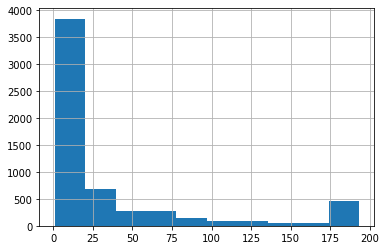

In [18]:
a = passed_steps.groupby('user_id',as_index = False).agg({'passed_steps':"count"}).passed_steps.hist()
a

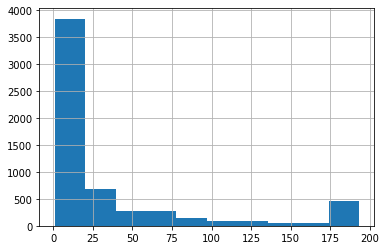

In [19]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .size() \
    .hist()

In [20]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [21]:
users_events_data = events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False).size()
users_events_data

user_id
3         87
14         3
16       135
18         2
20         8
        ... 
26778      4
26783     10
26786     31
26789      2
26790      6
Length: 5945, dtype: int64

# Правильное решение с учетом пользоваталей которые не решили ни одной задачи (pivot_table)

In [22]:
a = events_data.pivot_table(index = 'user_id', columns = 'action',
                        values = 'step_id',
                        aggfunc = 'count', 
                        fill_value = 0).reset_index()
a.head()

action,user_id,discovered,passed,started_attempt,viewed
0,3,91,87,30,192
1,14,4,3,1,9
2,16,140,135,70,298
3,18,3,2,0,3
4,20,10,8,0,13


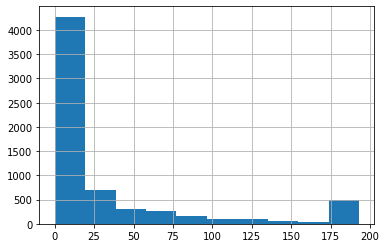

In [23]:
a['discovered'].hist()

In [24]:
users_events_data = events_data.pivot_table(index = 'user_id', 
                        columns = 'action',
                        values = 'step_id',
                        aggfunc = 'count', 
                        fill_value = 0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,3,91,87,30,192
1,14,4,3,1,9
2,16,140,135,70,298
3,18,3,2,0,3
4,20,10,8,0,13


In [25]:
submissons_data = pd.read_csv('D:\statistics\submissions_data_train\submissions_data_train.csv')
submissons_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [26]:
submissons_data['date'] = pd.to_datetime(submissons_data.timestamp,unit='s')
submissons_data['day'] = submissons_data.date.dt.date
submissons_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [27]:
users_scores = submissons_data.pivot_table( index = 'user_id',
                            columns = 'submission_status',
                            values = 'step_id',
                           aggfunc = 'count', 
                           fill_value = 0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [28]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [29]:
events_data[['user_id','day']].drop_duplicates().head()

,user_id,day
0,17632,2015-06-15
36,12494,2015-06-15
59,442,2015-06-15
62,22254,2015-06-15
94,6646,2015-06-15


In [30]:
events_data[['user_id','day', 'timestamp']].drop_duplicates(subset = ['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [31]:
events_data[['user_id','day', 'timestamp']].drop_duplicates(
    subset = ['user_id','day']).groupby('user_id')['timestamp'].apply(list).head()

user_id
3     [1434358476, 1441257725, 1441440209, 144153391...
14                                         [1436366155]
16    [1435674765, 1435725695, 1435895233, 143609381...
18                                         [1438541140]
20                                         [1443033283]
Name: timestamp, dtype: object

In [32]:
a = events_data[['user_id','day', 'timestamp']].drop_duplicates(subset = ['user_id','day']).head()
a

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [33]:
a.groupby('user_id')['day'].apply(list).head()

user_id
442      [2015-06-15]
6646     [2015-06-15]
12494    [2015-06-15]
17632    [2015-06-15]
22254    [2015-06-15]
Name: day, dtype: object

In [34]:
events_data[['user_id','day', 'timestamp']].drop_duplicates(
    subset = ['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()

user_id
3      [6899249, 182484, 93710, 2768870, 171400, 78712]
14                                                   []
16    [50930, 169538, 198580, 60037, 107104, 64636, ...
18                                                   []
20                                                   []
Name: timestamp, dtype: object

In [35]:
np.diff([1,4,30,4])

array([  3,  26, -26])

In [36]:
gap_data = events_data[['user_id','day', 'timestamp']].drop_duplicates(
    subset = ['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

array([array([6899249,  182484,   93710, 2768870,  171400,   78712]),
       array([], dtype=int32),
       array([  50930,  169538,  198580,   60037,  107104,   64636,   87453,
         87297,  198829, 3800882, 1728353, 4821849, 2937859]),
       ...,
       array([   87792,   265168,   232018,     1616,   241131,   225023,
       23014002]),
       array([], dtype=int32), array([238225, 893964])], dtype=object)

In [37]:
np.concatenate(gap_data, axis = 0)

array([ 6899249,   182484,    93710, ..., 23014002,   238225,   893964])

In [38]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))
gap_data


0         6899249
1          182484
2           93710
3         2768870
4          171400
           ...   
25281      241131
25282      225023
25283    23014002
25284      238225
25285      893964
Length: 25286, dtype: int32

In [39]:
gap_data = gap_data / (24*60*60)

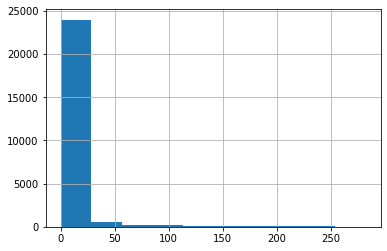

In [40]:
gap_data.hist()

In [41]:
gap_data.quantile(0.90) 


11.18961226851852

In [42]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
1048570,32191,1458917543,discovered,15384,2016-03-25 14:52:23,2016-03-25
1048571,32191,1458917543,viewed,15384,2016-03-25 14:52:23,2016-03-25
1048572,33733,1458917563,viewed,761,2016-03-25 14:52:43,2016-03-25
1048573,33123,1458917866,viewed,22866,2016-03-25 14:57:46,2016-03-25
1048574,33894,1458917868,viewed,15655,2016-03-25 14:57:48,2016-03-25


In [43]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'})     
users_data = users_data.rename(columns = {'timestamp': 'last_timestamp'})

In [44]:
users_data.head()

,user_id,last_timestamp
0,3,1444581588
1,14,1436368676
2,16,1449988134
3,18,1438541223
4,20,1443033703


In [45]:
now = 1458917868
drop_out_threshold = 30 * 24 * 60 * 60

In [46]:
users_data['is_gone_user'] = (now -  users_data.last_timestamp) > drop_out_threshold
users_data.head(10)

,user_id,last_timestamp,is_gone_user
0,3,1444581588,True
1,14,1436368676,True
2,16,1449988134,True
3,18,1438541223,True
4,20,1443033703,True
5,28,1442305755,True
6,33,1438706621,True
7,38,1436271885,True
8,39,1458912392,False
9,42,1449325382,True


In [47]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')

In [48]:
users_data.merge(users_scores.head())

,user_id,last_timestamp,is_gone_user,correct,wrong
0,3,1.444582e+09,True,29.0,23.0
1,14,1.436369e+09,True,0.0,1.0
2,2,NaN,NaN,2.0,0.0
3,5,NaN,NaN,2.0,2.0
4,8,NaN,NaN,9.0,21.0


In [49]:
users_data = users_data.fillna(0).head()

In [50]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,3,1.444582e+09,True,29.0,23.0
1,14,1.436369e+09,True,0.0,1.0
2,16,1.449988e+09,True,77.0,106.0
3,18,1.438541e+09,True,0.0,0.0
4,20,1.443034e+09,True,0.0,0.0


In [51]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,3,91,87,30,192
1,14,4,3,1,9
2,16,140,135,70,298
3,18,3,2,0,3
4,20,10,8,0,13


In [52]:
users_data = users_data.merge(users_events_data, on = 'user_id', how = 'outer')

In [53]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,3,1.444582e+09,True,29.0,23.0,91,87,30,192
1,14,1.436369e+09,True,0.0,1.0,4,3,1,9
2,16,1.449988e+09,True,77.0,106.0,140,135,70,298
3,18,1.438541e+09,True,0.0,0.0,3,2,0,3
4,20,1.443034e+09,True,0.0,0.0,10,8,0,13


In [54]:
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [55]:
users_day.head()

,user_id,day
0,3,7
1,14,1
2,16,14
3,18,1
4,20,1


In [56]:
users_data = users_data.merge(users_day,on='user_id',  how='outer')

In [57]:
users_data.user_id.nunique()

6486

In [58]:
events_data.user_id.nunique()

6486

In [59]:
users_data['passed_course'] = users_data.passed  > 170

In [60]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False
1,14,1.436369e+09,True,0.0,1.0,4,3,1,9,1,False
2,16,1.449988e+09,True,77.0,106.0,140,135,70,298,14,False
3,18,1.438541e+09,True,0.0,0.0,3,2,0,3,1,False
4,20,1.443034e+09,True,0.0,0.0,10,8,0,13,1,False


In [61]:
users_data.groupby('passed_course', as_index = False).count()

,passed_course,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,False,6017,5,5,5,5,6017,6017,6017,6017,6017
1,True,469,0,0,0,0,469,469,469,469,469


In [62]:
100 * 469 / 6017 # процент прошедших курсы

7.794582017616753

In [63]:
users_data[users_data.passed_course].day.median()

18.0

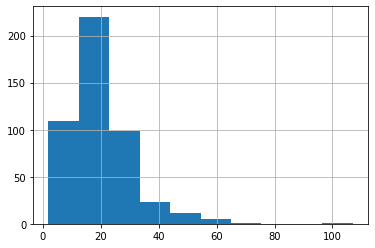

In [64]:
users_data[users_data.passed_course].day.hist()

In [65]:
user_min_time = events_data.groupby('user_id', as_index = False)

In [66]:
 events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [67]:
user_min_time = events_data.groupby('user_id', as_index = False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'}, axis = 1)

In [68]:
user_min_time.head()

,user_id,min_timestamp
0,3,1434358476
1,14,1436366155
2,16,1435674765
3,18,1438541140
4,20,1443033283


In [69]:
users_data = users_data.merge(user_min_time, how = 'outer')

In [70]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False,1434358476
1,14,1.436369e+09,True,0.0,1.0,4,3,1,9,1,False,1436366155
2,16,1.449988e+09,True,77.0,106.0,140,135,70,298,14,False,1435674765
3,18,1.438541e+09,True,0.0,0.0,3,2,0,3,1,False,1438541140
4,20,1.443034e+09,True,0.0,0.0,10,8,0,13,1,False,1443033283


# "НЕПРАВИЛЬНЫЙ" СПОСОБ

In [71]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [72]:
event_data_train = pd.DataFrame()

In [73]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.loc[0]
    break

In [74]:
min_user_time

1434358476

In [75]:
user_id

3

In [76]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.loc[0]
    #print(min_user_time)
    time_threshold = min_user_time  + 3 * 24 *3600
    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
    break
                    

In [77]:
user_events_data

,step_id,timestamp,action,user_id,date,day
7363,32815,1434358476,viewed,3,2015-06-15 08:54:36,2015-06-15
7364,32815,1434358476,passed,3,2015-06-15 08:54:36,2015-06-15
7365,32815,1434358476,discovered,3,2015-06-15 08:54:36,2015-06-15
7367,32811,1434358481,viewed,3,2015-06-15 08:54:41,2015-06-15
7368,32811,1434358481,passed,3,2015-06-15 08:54:41,2015-06-15
7369,32811,1434358481,discovered,3,2015-06-15 08:54:41,2015-06-15
7389,32929,1434358504,discovered,3,2015-06-15 08:55:04,2015-06-15
7390,32929,1434358504,viewed,3,2015-06-15 08:55:04,2015-06-15
7391,32811,1434358511,viewed,3,2015-06-15 08:55:11,2015-06-15
7392,32815,1434358512,viewed,3,2015-06-15 08:55:12,2015-06-15


In [78]:
events_data = events_data.merge(user_min_time, how = 'outer')
events_data_3_days = events_data.query("timestamp <= min_timestamp + 3 * 24 * 60* 60")
events_data_3_days.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [79]:
event_data_train = pd.DataFrame()

In [80]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [81]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848,17632_1434340895


In [82]:
learning_time_threshold = 3 * 24 *3600
learning_time_threshold

259200

In [83]:
user_min_time.head()

,user_id,min_timestamp
0,3,1434358476
1,14,1436366155
2,16,1435674765
3,18,1438541140
4,20,1443033283
